In [1]:
#read dat file
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

columns = ['frequency', 'angle_of_attack', 'chord_length', 'free_stream_velocity', 'suction_side_displacement_thickness',
           'scaled_sound_pressure_level']

#load data from .dat file
airfoil_dataset = pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None, names=columns)

In [2]:
#partition to data and target

data = airfoil_dataset.iloc[1:,0:-1]
target = airfoil_dataset.iloc[1:,-1]

data.head()

#sb.pairplot(data, diag_kind="kde")

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
5,2500,0.0,0.3048,71.3,0.002663


In [ ]:
# #standardization
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)

# scaled_data_pd = pd.DataFrame(scaled_data, columns = ['frequency', 'angle_of_attack', 'chord_length', 'free_stream_velocity', 
# 'suction_side_displacement_thickness'])

# scaled_data_pd.describe()

In [3]:
#partition to train and test
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=10)

print("Training dataset:")
print("train_data:", train_data.shape)
print("train_target:", train_target.shape)

print("Testing dataset:")
print("test_data:", test_data.shape)
print("test_target:", test_target.shape)


Training dataset:
train_data: (1201, 5)
train_target: (1201,)
Testing dataset:
test_data: (301, 5)
test_target: (301,)


In [4]:
#normalization
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(train_data)

# transform training data
train_data_norm = norm.transform(train_data)

# transform testing data
test_data_norm = norm.transform(test_data)

normalized_data_pd = pd.DataFrame(train_data_norm, columns = ['frequency', 'angle_of_attack', 'chord_length', 'free_stream_velocity', 
'suction_side_displacement_thickness'])

normalized_data_pd.head()


,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness
0,0.010101,0.324324,0.454545,1.000000,0.122731
1,0.015152,0.783784,0.000000,0.199495,0.289946
2,0.070707,0.000000,0.727273,1.000000,0.030042
3,0.002525,0.572072,0.000000,0.199495,0.217626
4,0.242424,0.378378,0.090909,1.000000,0.084372


In [5]:
#Linear Regression

from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(train_data_norm, train_target)



LinearRegression()

In [56]:
#Neural Network

from sklearn.neural_network import MLPRegressor

neural_network = MLPRegressor(hidden_layer_sizes=(200,100,50),
                       max_iter = 300, activation = 'relu',
                       solver = 'adam')

neural_network.fit(train_data_norm, train_target)


MLPRegressor(hidden_layer_sizes=(2000, 1000, 550), max_iter=3000)

In [57]:
#model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


print("Mean squared error of a learned linear regression model: %.2f" % 
      mean_squared_error(test_target, linear_regression.predict(test_data_norm)))
print("Mean squared error of a learned neural network model: %.2f" % 
      mean_squared_error(test_target, neural_network.predict(test_data_norm)))
print("")

print('Variance score: %.2f' % r2_score(test_target, linear_regression.predict(test_data_norm)))
print('Variance score for neural network model: %.2f' % r2_score(test_target, neural_network.predict(test_data_norm)))
print("")

scores = cross_val_score(LinearRegression(), data, target, cv=5)
print("Cross validation linear:")
print(scores)
print("")

scores = cross_val_score(MLPRegressor(), data, target, cv=5)
print("Cross validation neural model:")
print(scores)


Mean squared error of a learned linear regression model: 19.55
Mean squared error of a learned neural network model: 26.04

Variance score: 0.54
Variance score for neural network model: 0.38

Cross validation linear:
[ 0.70551145  0.52884577  0.58908692 -0.31095165  0.53688916]

Cross validation neural model:
[-46.04840473 -28.26645209 -30.74979194 -30.71421758 -19.65135858]


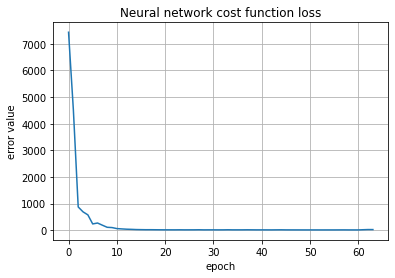

In [58]:
plt.plot(neural_network.loss_curve_)
plt.title('Neural network cost function loss')

plt.xlabel('epoch'); plt.ylabel('error value'); plt.grid()